**Exporting libraries**

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter, defaultdict
from operator import itemgetter

drop_list = []

**Loading Necessary Functions**


In [0]:
def pickleLoad(filename):
    with open(filename, "rb") as f:
        filetype = pickle.load(f)
    return filetype

def pickleUnload(filename,filetype):
    with open(filename, "wb") as f:
        pickle.dump(filetype, f)

def one_hot(df, cols):
    for each in cols:
        try:
            one_hot = pd.get_dummies(df[each], prefix=each,drop_first=True)
            df = df.join(one_hot)
        except:
            continue
    df.drop(cols, axis=1,inplace=True)
    return df

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return np.mean(distances)

**Reading the data file**

In [4]:
df = pd.read_csv('population.csv')
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


**Replacing the missing values** 

In [5]:
df.replace(" ?", np.nan, inplace=True)
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


**Displaying columns and % of null values in them**

In [6]:
print (df.isnull().mean())

AAGE        0.000000
ACLSWKR     0.000000
ADTIND      0.000000
ADTOCC      0.000000
AHGA        0.000000
AHRSPAY     0.000000
AHSCOL      0.000000
AMARITL     0.000000
AMJIND      0.000000
AMJOCC      0.000000
ARACE       0.000000
AREORGN     0.000000
ASEX        0.000000
AUNMEM      0.000000
AUNTYPE     0.000000
AWKSTAT     0.000000
CAPGAIN     0.000000
CAPLOSS     0.000000
DIVVAL      0.000000
FILESTAT    0.000000
GRINREG     0.000000
GRINST      0.003548
HHDFMX      0.000000
HHDREL      0.000000
MIGMTR1     0.499672
MIGMTR3     0.499672
MIGMTR4     0.499672
MIGSAME     0.000000
MIGSUN      0.499672
NOEMP       0.000000
PARENT      0.000000
PEFNTVTY    0.033645
PEMNTVTY    0.030668
PENATVTY    0.017006
PRCITSHP    0.000000
SEOTR       0.000000
VETQVA      0.000000
VETYN       0.000000
WKSWORK     0.000000
YEAR        0.000000
dtype: float64


**Deleting columns with more than 40% of null values**

In [7]:
df = df[df.columns[df.isnull().mean() < 0.4]]
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


**Visualising Histograms from columns**

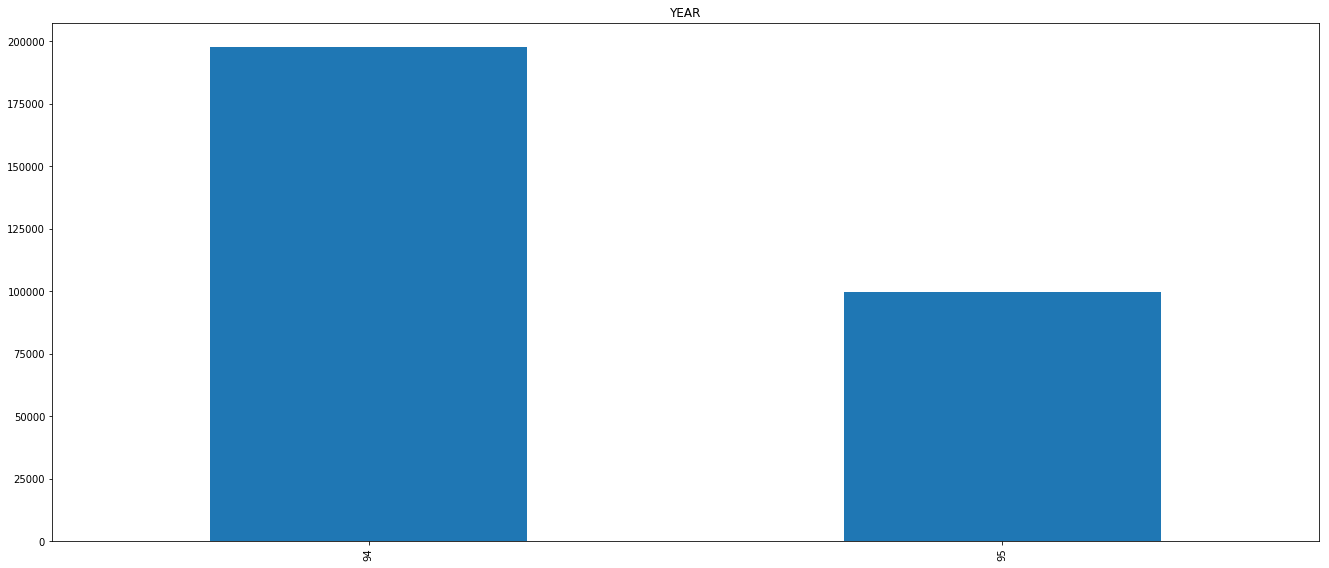

In [8]:
i = 0
for title in list(df):
    plt.subplots_adjust(left=0.07, bottom=0.23, right=0.95, top=0.95, wspace=None, hspace=None)
    df[title].value_counts().plot(figsize=(20,10),kind='bar')
    plot_title = str(title)
    plt.title(plot_title)
#     plt.savefig("p3_data/graphs/50k/"+str(i)+"_"+plot_title)
    i+=1

**Removing Features with 75% same values**

In [0]:
data_size = int(df['GRINST'].size*0.75)
for title in list(df):
    try:
        if (df[title].value_counts()[0] > data_size):
            drop_list.append(title)
    except:
        continue
df.drop(drop_list, axis=1,inplace=True)

**Converting Numerical features to 8 bin**

In [0]:
for y in df.columns:
    if df[y].dtype == np.int64:
        df[y] = pd.cut(df[y],8)

**Converting all the features type to categorical**

In [0]:
for title in list(df):
    df[title] = df[title].astype('category',copy=False)

**Shape and Type of Categories**

In [12]:
print (df.shape)
print (df.dtypes)

(199523, 19)
AAGE        category
ACLSWKR     category
ADTIND      category
ADTOCC      category
AHGA        category
AMARITL     category
AMJIND      category
AMJOCC      category
ASEX        category
AWKSTAT     category
FILESTAT    category
HHDFMX      category
HHDREL      category
MIGSAME     category
NOEMP       category
PARENT      category
VETYN       category
WKSWORK     category
YEAR        category
dtype: object


**Replace Missing Values with column's mode**

In [0]:
for column in df.columns:
    df[column].replace(np.nan,df[column].mode()[0], inplace=True)

**One hot encoding**

In [0]:
df = one_hot(df, list(df))
column_name = list(df)

**Graph Plot Cumulative Variance vs Number of Components**

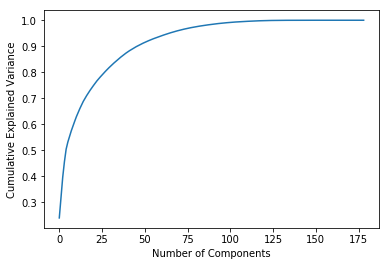

In [15]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Fitting PCA with n=75**

In [0]:
pca = PCA(n_components=75)
pca.fit(df)
df_n = pca.transform(df)

**Amount of variance each PC has**

In [17]:
print((pca.explained_variance_ratio_))

[0.24075037 0.0794087  0.07677075 0.05964156 0.0480469  0.02748753
 0.02165467 0.02125885 0.01883053 0.01803174 0.01772264 0.01593283
 0.01482808 0.01408188 0.01353845 0.01153547 0.01102055 0.01035297
 0.00994296 0.00940464 0.00917981 0.00886996 0.00874879 0.00780445
 0.00753739 0.00724381 0.00717224 0.00707654 0.00680736 0.00666319
 0.00632632 0.0062018  0.00605251 0.00575755 0.00567799 0.00566758
 0.00553266 0.00525591 0.00519231 0.00477743 0.00466715 0.00430333
 0.00405211 0.00400955 0.00392526 0.00379495 0.00343535 0.00339757
 0.00334363 0.00321825 0.00307822 0.00290293 0.0028757  0.0027852
 0.00272643 0.00258314 0.00244624 0.00243916 0.00240073 0.00234322
 0.00232712 0.00230515 0.00219311 0.00215259 0.00212986 0.00205951
 0.00197257 0.00191269 0.001855   0.00183108 0.00170656 0.00162806
 0.00160711 0.00158743 0.00149   ]


**Mapping weights to 1st,2nd,3rd principal component**

In [18]:
for i in range(3):
    print ("**** Principal Component - {} ****".format(i+1))
    A = abs(pca.components_[i])
    ranks = np.argsort(A)
    for a in ranks:
        print ("{} - {}".format(column_name[a],A[a]))
    print ("\n\n")

**** Principal Component - 1 ****
VETYN_(0.5, 0.75] - 0.0
VETYN_(1.25, 1.5] - 0.0
VETYN_(1.5, 1.75] - 0.0
VETYN_(1.0, 1.25] - 0.0
YEAR_(94.125, 94.25] - 0.0
VETYN_(0.25, 0.5] - 0.0
YEAR_(94.25, 94.375] - 0.0
YEAR_(94.375, 94.5] - 0.0
YEAR_(94.75, 94.875] - 0.0
YEAR_(94.625, 94.75] - 0.0
NOEMP_(3.0, 3.75] - 0.0
YEAR_(94.5, 94.625] - 0.0
HHDFMX_ Child <18 ever marr RP of subfamily - 9.219573416620123e-07
HHDFMX_ Other Rel <18 ever marr RP of subfamily - 1.399167381010893e-06
HHDFMX_ Grandchild 18+ never marr RP of subfamily - 1.5307365593940757e-06
HHDFMX_ Grandchild <18 ever marr not in subfamily - 1.891646346668146e-06
HHDFMX_ Other Rel <18 spouse of subfamily RP - 2.5399357271727216e-06
HHDFMX_ Other Rel <18 ever marr not in subfamily - 2.6153947785564857e-06
HHDFMX_ Child <18 spouse of subfamily RP - 3.056587717049993e-06
HHDFMX_ Grandchild <18 never marr RP of subfamily - 5.038240382415991e-06
HHDFMX_ Other Rel 18+ never marr RP of subfamily - 7.8140910090644e-06
HHDFMX_ Other Rel <

**K mean clustering distance**

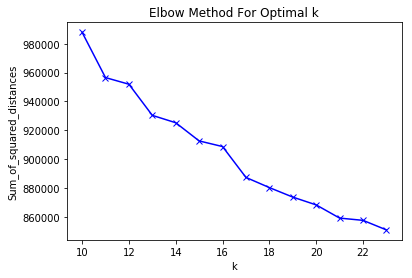

In [19]:
Sum_of_squared_distances = []
K = range(10,24)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_n)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**K mean clustering with n = 22**

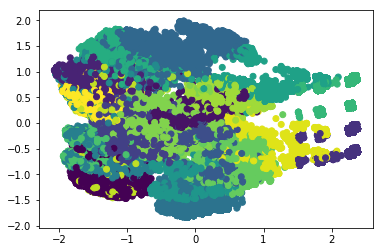

In [20]:
#K mean clustering with n = 22
clusters = 22
kmeans = KMeans(n_clusters=clusters).fit(df_n)
plt.figure('K-means with {} clusters'.format(clusters))
plt.scatter(df_n[:, 0], df_n[:, 1],c=kmeans.labels_)
plt.show()

**Calculates % of data points in each cluster**

In [21]:
count = 0
proportions = []
cluster_count = Counter(kmeans.labels_)
for a in cluster_count.items():
    count += a[1]
for a in cluster_count.items():
    proportions.append([a[0],round((float(a[1])/float(count))*100.0,2)])
print (sorted(proportions, key=itemgetter(0)))

[[0, 6.0], [1, 3.34], [2, 8.27], [3, 11.2], [4, 4.89], [5, 3.84], [6, 1.72], [7, 4.83], [8, 3.89], [9, 4.89], [10, 1.6], [11, 2.68], [12, 2.92], [13, 3.71], [14, 12.56], [15, 3.31], [16, 2.78], [17, 4.54], [18, 3.34], [19, 2.25], [20, 2.53], [21, 4.9]]


**Comparison with Clusters formed in population.csv vs more_than_50k**


1. [0, 6.0] - [0, 4.16] ***(Similar)***
2. [1, 3.34] - [1, 7.32] ***(Over represented in more_than_50k)***
3. [2, 8.27] - [2, 4.16] ***(Over represented in general pop.)***
4. [3, 11.2] - [3, 7.32] ***(Similar)***
5. [4, 4.89] - [4, 6.03] ***(Similar)***
6. [5, 3.84] - [5, 2.63] ***(Similar)***
7. [6, 1.72] - [6, 3.3] ***(Similar)***
8. [7, 4.83] - [7, 3.66] ***(Similar)***
9. [8, 3.89] - [8, 4.8] ***(Similar)***
10. [9, 4.89] - [9, 4.22]  ***(Similar)***
11. [10, 1.6] - [10, 2.4] ***(Similar)***
12. [11, 2.68] - [11, 4.41] ***(Similar)***
13. [12, 2.92] - [12, 6.7] ***(Over represented in more_than_50k)***
14. [13, 3.71] - [13, 4.94] ***(Similar)***
15. [14, 12.56] - [14, 2.79] ***(Over represented in general pop.)***
16. [15, 3.31] - [15, 4.3] ***(Similar)***
17. [16, 2.78] - [16, 3.44] ***(Similar)***
18. [17, 4.54] - [17, 5.5] ***(Similar)***
19. [18, 3.34] - [18, 9.22] ***(Over represented in more_than_50k)***
20. [19, 2.25] - [19, 2.12] ***(Similar)***
21. [20, 2.53] - [20, 3.69] ***(Similar)***
22. [21, 4.9]] - [21, 2.88] ***(Similar)***
